In [1]:
import numpy as np

# AND 게이트 입력과 출력 데이터
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [0], [0], [1]])

# 시그모이드 함수 정의
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# 손실 함수 정의 (평균 제곱 오차)
def mse_loss(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

# 퍼셉트론 클래스 정의
class Perceptron:
    def __init__(self, input_size):
        self.weights = np.random.randn(input_size, 1)  # 가중치 랜덤 초기화
        self.bias = np.random.randn(1)  # 편향 랜덤 초기화

    
    # 순전파
    def forward(self, X):
        # 각 값을 곱하고 summation까지 하는 과정
        z = np.dot(X, self.weights) + self.bias
        # 반환시 활성화함수 적용
        return sigmoid(z)

    # 역전파
    def backward(self, X, y, learning_rate):
        # MSE에서 mean을 하기 위한 값 (1/n)
        n = X.shape[0]
        predictions = self.forward(X)

        # 손실 함수, 활성화 함수에 대한 편미분
        # 2 * (predictions - y) / n 의 경우 손실 함수의 미분값
        # predictions * (1 - predictions) 의 경우 시그모이드 미분값
        d_loss = 2 * (predictions - y) * predictions * (1 - predictions) / n

        # 가중치와 편향 업데이트
        # 가중치와 bias의 업데이트의 경우 마지막 편미분 방식만 다름
        # 가중치의 경우 시그마를 w에 대해 미분한 값은 x값 내적
        self.weights -= learning_rate * np.dot(X.T, d_loss)
        # bias의 경우 1이라는 값이 나오기 때문에 모든 값을 더한 후 bias 갱신
        self.bias -= learning_rate * np.sum(d_loss)

    # 학습
    def train(self, X, y, learning_rate, epochs):
        # epochs : 학습 횟수
        for epoch in range(epochs):
            # 역전파 사용
            self.backward(X, y, learning_rate)
            # 학습 횟수 100번마다 MSE 값 출력
            if epoch % 100 == 0:
                loss = mse_loss(y, self.forward(X))
                print(f'Epoch {epoch}, Loss: {loss:.4f}')

# 퍼셉트론 객체 생성 및 훈련
input_size = X.shape[1]
perceptron = Perceptron(input_size)
# 학습률
learning_rate = 0.1
# 학습횟수
epochs = 1000
# 학습
perceptron.train(X, y, learning_rate, epochs)

# 훈련된 퍼셉트론으로 예측 수행
predictions = perceptron.forward(X)
print("예측 결과:", predictions)


Epoch 0, Loss: 0.2259
Epoch 100, Loss: 0.1274
Epoch 200, Loss: 0.1091
Epoch 300, Loss: 0.0960
Epoch 400, Loss: 0.0858
Epoch 500, Loss: 0.0775
Epoch 600, Loss: 0.0706
Epoch 700, Loss: 0.0649
Epoch 800, Loss: 0.0599
Epoch 900, Loss: 0.0556
예측 결과: [[0.04118625]
 [0.23930594]
 [0.24245809]
 [0.70095591]]


[3. 5. 7.]


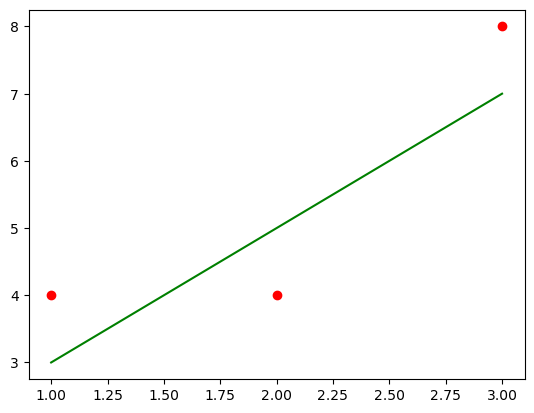

In [2]:
import numpy as np
import matplotlib.pyplot as plt

data = np.array([[1, 4], [2, 4], [3, 8]])

# data[:, 0] : data의 1열의 모든 값(1,2,3) 입력값을 의미
# data[:. 1] : data의 2열의 모든 값(4,4,8) 타겟값을 의미
plt.plot(data[:, 0], data[:, 1], 'ro')

x = np.linspace(start=1, stop=3, num=3)
# 회귀식
y = 2 * x + 1

print(y)

plt.plot(x, y, 'g-')

In [3]:
# 회귀식의 예측값
y_predict = 2 * data[:, 0] + 1
# error 값
e = y_predict - data[:, 1]
print(e)

# 잔차제곱합
sum_of_squares = e.T @ e # e.dot(e.T)
print(sum_of_squares)

[-1  1 -1]
3


2.121212121212121


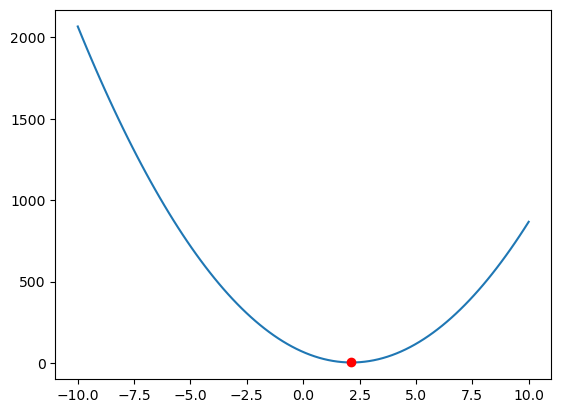

In [4]:
data = np.array([[1, 4], [2, 4], [3, 8]])

# Define a range of w values
w_range = np.linspace(start=-10, stop=10, num=100)

# Compute the sum of squares for each w
sum_of_squares = []
for w in w_range:
    # 위 코드에서의 회귀식의 w 값은 2로 고정
    # 아래의 경우 -10 부터 10까지의 값을 바꿔가며 잔차제곱합을 계산
    y_hat = w * data[:, 0] + 1
    e = y_hat - data[:, 1]
    # 아래의 배열에 각 w에 따른 잔차제곱합 값들을 저장
    sum_of_squares.append(e.T @ e)

plt.plot(w_range, sum_of_squares)

# Find the optimal w for the given data
# 가장 작은 잔차제곱합의 값을 가져옴
optimal_w = w_range[np.argmin(sum_of_squares)]
print(optimal_w)

# Plot the optimal w and the sum of squares
plt.plot(optimal_w, np.min(sum_of_squares), 'ro')
plt.show()

X.shape: (200, 2)
y.shape: (200, 1)
original model : y = 86.45x + 100


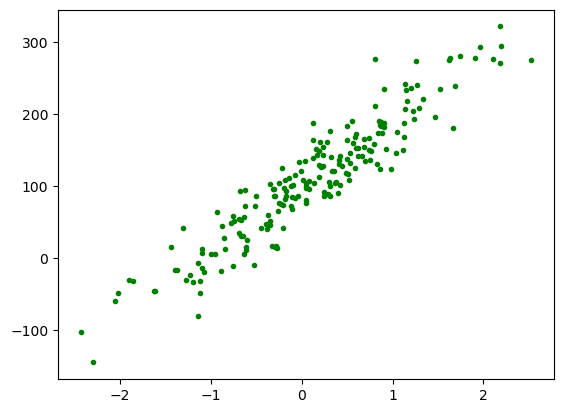

In [5]:
from sklearn.datasets import make_regression
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np

b = 100
# 특정한 w 값을 가지는 회귀식을 기준으로 200개의 랜덤한 분포를 가지는 데이터 생성
X0, y, w = make_regression(n_samples=200, n_features=1,
                           bias=b, noise=30,
                           coef=True, random_state=1)
# bias의 update를 위해서 기존의 X0이라는 데이터에 1의 값을 가지는 새로운 열 생성
X = sm.add_constant(X0)
y = y.reshape(len(y), 1)

print(f'X.shape: {X.shape}')
print(f'y.shape: {y.shape}')

plt.plot(X0, y, 'g.')

print(f'original model : y = {w:0.2f}x + {b}')

ols model : y = 87.99x + 99.37


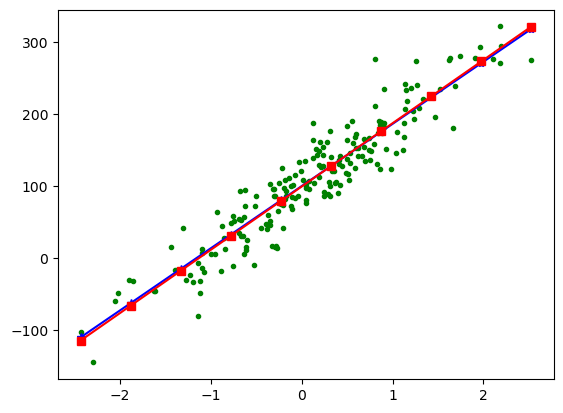

In [6]:
# OLS 방식을 사용하여 최적의 가중치 벡터 w를 구하는 식
# np.linalg.inv : 역행렬을 구하는 함수
w_star = np.linalg.inv(X.T @ X) @ X.T @ y

print(f'ols model : y = {w_star[1].item():0.2f}x + {w_star[0].item():0.2f}')

x_new = np.linspace(np.min(X0), np.max(X0), 10)
X_new = sm.add_constant(x_new)

# 우리가 구한 최적의 가중치 벡터를 적용
y_new = X_new @ w_star
# 기존에 make_regression을 사용하여 나온 가중치와 bias 적용
y_origin = X_new @ [b, w]

plt.plot(X0, y, 'g.')
plt.plot(x_new, y_origin, 'b*-')
plt.plot(x_new, y_new, 'rs-')
plt.show()